# ARAR: Analytical Research of Accident Reports
### DiLeo & Wolfe Final Project

# Import Libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in Dataset to Dataframe

In [78]:
#import dataset
df = pd.read_csv('C:/Users/Adam/Desktop/US_Accidents_June20.csv')

In [79]:
#display head of dataframe
pd.set_option('display.max_columns', None)
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Drop columns that are not used for evaluation

In [80]:
#drop columns we already know we do not need
df.drop(["ID", "Source", "TMC", "Distance(mi)", "Description", "Number", "Street", "Airport_Code", "Weather_Timestamp", "Country"], axis = 1, inplace = True)

In [81]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Side,City,County,State,Zipcode,Timezone,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,R,Dayton,Montgomery,OH,45424,US/Eastern,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,L,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,R,Williamsburg,Clermont,OH,45176,US/Eastern,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,R,Dayton,Montgomery,OH,45417,US/Eastern,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,R,Dayton,Montgomery,OH,45459,US/Eastern,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


# Find null values and drop cols/records

In [82]:
df.isnull().sum()

Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Timezone                    3880
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitation(in)        2025874
Weather_Condition          76138
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station   

In [83]:
#dropping further based on too many null values
df.drop(["End_Lat", "End_Lng", "Wind_Chill(F)", "Precipitation(in)"], axis = 1, inplace = True)

In [84]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Zipcode,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,R,Dayton,Montgomery,OH,45424,US/Eastern,36.9,91.0,29.68,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,L,Reynoldsburg,Franklin,OH,43068-3402,US/Eastern,37.9,100.0,29.65,10.0,Calm,NaN,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,Clermont,OH,45176,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,R,Dayton,Montgomery,OH,45417,US/Eastern,35.1,96.0,29.64,9.0,SW,4.6,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,R,Dayton,Montgomery,OH,45459,US/Eastern,36.0,89.0,29.65,6.0,SW,3.5,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [85]:
df.isnull().sum()

Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Side                          0
City                        112
County                        0
State                         0
Zipcode                    1069
Timezone                   3880
Temperature(F)            65732
Humidity(%)               69687
Pressure(in)              55882
Visibility(mi)            75856
Wind_Direction            58874
Wind_Speed(mph)          454609
Weather_Condition         76138
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_Calming               0
Traffic_Signal                0
Turning_Loop                  0
Sunrise_

In [86]:
#drop records with null values
df.dropna(axis = 0, inplace = True)

Text(0, 0.5, 'Accident Count')

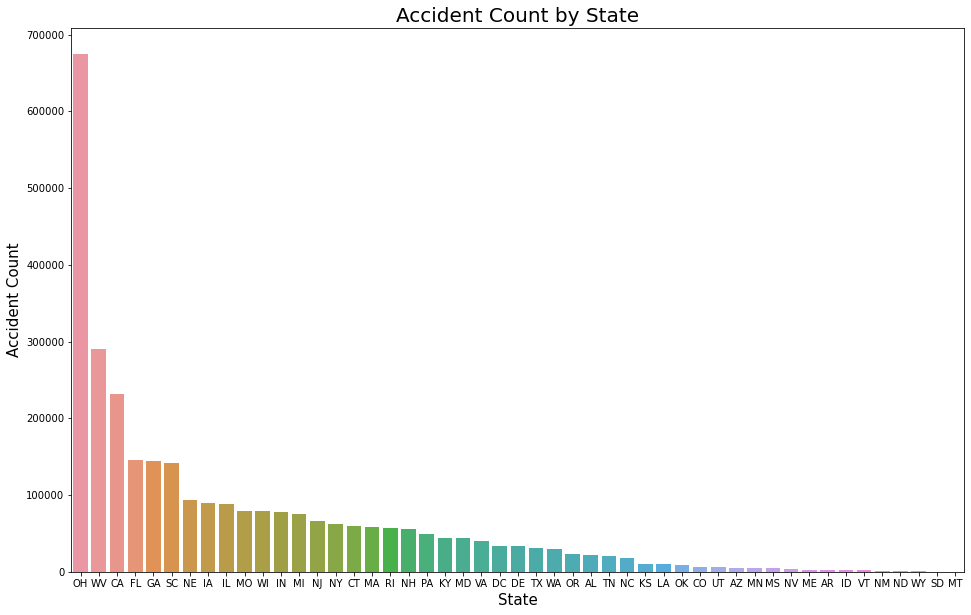

In [87]:
#EDA countplot of State accident counts
state_list = df['State'].unique()
state_count = df['State'].value_counts()

plt.figure(figsize=(16,10))
sns.barplot(state_list, state_count)
plt.title("Accident Count by State", fontdict={'fontsize': 20})
plt.xlabel("State", fontdict={'fontsize': 15})
plt.ylabel("Accident Count", fontdict={'fontsize': 15})

Text(0, 0.5, 'Accident Count')

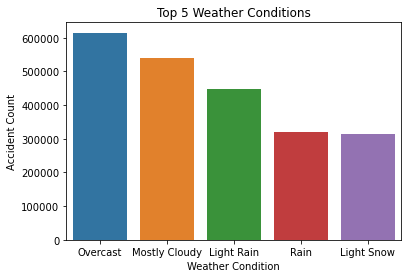

In [88]:
#EDA top 5 weather conditions when accidents happen
weather_list = df['Weather_Condition'].unique()
weather_counts = df['Weather_Condition'].value_counts()

sns.barplot(weather_list[:5], weather_counts[:5])
plt.title("Top 5 Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Count")

# Convert categorical data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027865 entries, 2 to 3513616
Data columns (total 35 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Start_Lat              float64
 4   Start_Lng              float64
 5   Side                   object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Timezone               object 
 11  Temperature(F)         float64
 12  Humidity(%)            float64
 13  Pressure(in)           float64
 14  Visibility(mi)         float64
 15  Wind_Direction         object 
 16  Wind_Speed(mph)        float64
 17  Weather_Condition      object 
 18  Amenity                bool   
 19  Bump                   bool   
 20  Crossing               bool   
 21  Give_Way               bool   
 22  Junction          

In [90]:
from sklearn.preprocessing import LabelEncoder
#use label encoder to convert categorical data
LE = LabelEncoder()
df = df.apply(LE.fit_transform)

In [91]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Zipcode,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,1,1,1,638235,617910,2,11194,317,33,193654,1,332,99,865,41,15,6,77,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,2,2,2,677890,612438,2,2467,1037,33,197481,1,327,95,862,40,15,7,74,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,3,3,666590,613492,2,2467,1037,33,198524,1,332,88,863,36,15,6,74,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,2,4,4,713774,647340,2,11058,545,33,187816,1,343,96,861,38,14,6,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,6,5,679529,610824,2,2467,1037,33,197586,1,320,99,864,38,21,6,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


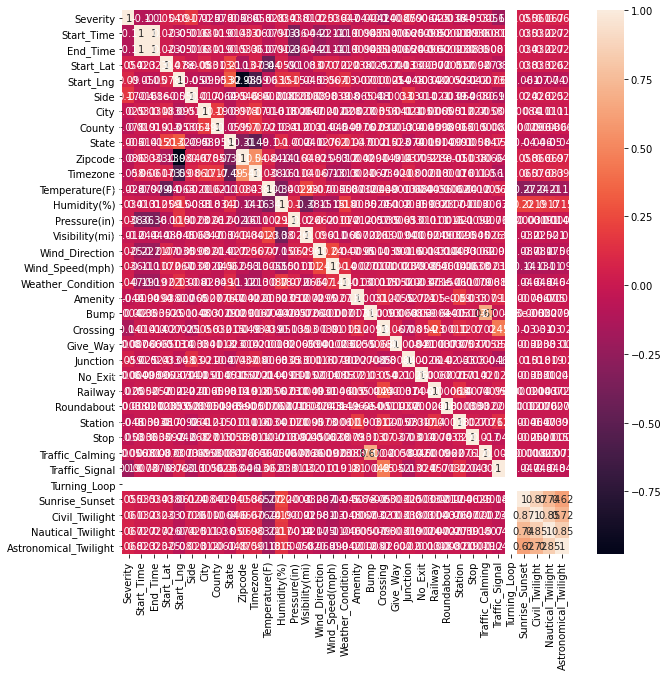

In [92]:
#plot heatmap to look for correlation
plt.figure(figsize=(10, 10))


plt = sns.heatmap(df.corr(), annot = True)


Text(0.5, 1.0, 'Severity Counts')

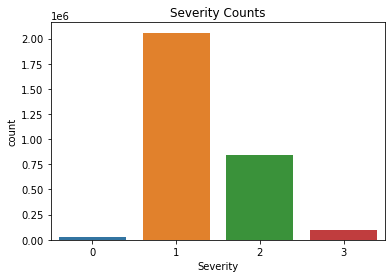

In [105]:
#show unbalanced data
sns.countplot(x='Severity', data = df)
plt.title("Severity Counts")

# Create X and y vectors for Gaussian Naive Bayes Analysis

In [106]:
#sample the df so runtimes aren't astronomical 
sample = df.sample(frac = 0.10, replace = False, random_state = 101)

In [107]:
#creating X and y vectors
X = sample.drop(['Severity'], axis = 1)
y = sample['Severity']

In [108]:
#standardize the X vector to account for any biases
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)

#convert back to dataframe
X_norm = pd.DataFrame(X_norm)

In [109]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=101)

In [110]:
from imblearn.over_sampling import SMOTE

In [111]:
#SMOTE (Synthetic Minority Over-sampling Technique) will resample the training dataset 
sm = SMOTE(random_state = 101)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [112]:
X_train.shape, y_train.shape

((658284, 34), (658284,))

In [113]:
#now all classes of Severity have equal values
y_train = pd.DataFrame(y_train, columns = ['Severity'])
y_train.Severity.value_counts()

3    164571
2    164571
1    164571
0    164571
Name: Severity, dtype: int64

Text(0.5, 1.0, 'Severity Counts')

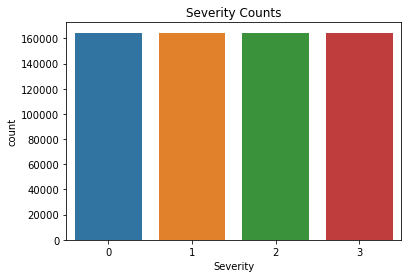

In [114]:
#show unbalanced data
sns.countplot(x='Severity', data = y_train)
plt.title("Severity Counts")

In [115]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,-1.149338,-1.144187,0.380961,-1.651977,0.469603,-0.348922,1.200131,-1.163582,1.244940,1.467759,-0.120071,0.480999,0.495471,0.317249,1.270101,-0.557068,0.963717,-0.108873,-0.012327,-0.294938,-0.051341,-0.295467,-0.034931,-0.094802,-0.007922,-0.142282,-0.122507,-0.019322,-0.468403,0.0,-0.572243,-0.497541,-0.421145,-0.360591
1,1.166141,1.171297,-0.903858,-0.900917,0.469603,1.574482,1.026420,-1.163582,1.041506,1.467759,-0.395815,0.569219,0.169398,0.317249,-1.722047,-1.635929,-0.892429,-0.108873,-0.012327,-0.294938,-0.051341,-0.295467,-0.034931,-0.094802,-0.007922,-0.142282,-0.122507,-0.019322,-0.468403,0.0,1.747511,2.009883,-0.421145,-0.360591
2,-0.134802,-0.142784,0.877801,1.546797,0.469603,1.783943,0.251576,0.532660,-1.837986,-0.309368,1.080749,0.480999,0.518762,0.317249,1.569315,-0.796814,1.398751,-0.108873,-0.012327,-0.294938,-0.051341,-0.295467,-0.034931,-0.094802,-0.007922,-0.142282,-0.122507,-0.019322,-0.468403,0.0,-0.572243,-0.497541,-0.421145,-0.360591
3,-1.071752,-1.067346,-1.648678,1.034126,0.469603,-0.616995,-1.634104,-0.837381,-0.553811,-0.309368,0.671581,1.142650,0.448889,-0.987058,0.222849,2.200022,2.123809,-0.108873,-0.012327,-0.294938,-0.051341,-0.295467,-0.034931,-0.094802,-0.007922,-0.142282,-0.122507,-0.019322,-0.468403,0.0,-0.572243,-0.497541,-0.421145,-0.360591
4,-1.266299,-1.259953,-1.577008,0.583354,0.469603,-1.117975,0.694997,-0.837381,-0.508171,-0.309368,0.885060,-0.004212,0.483826,0.317249,1.569315,0.042300,1.398751,-0.108873,-0.012327,-0.294938,-0.051341,-0.295467,-0.034931,-0.094802,-0.007922,-0.142282,-0.122507,-0.019322,2.134912,0.0,-0.572243,-0.497541,-0.421145,-0.360591


In [116]:
y_train.head()

,Severity
0,1
1,1
2,2
3,2
4,1


In [117]:
#fit Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

#Create Gaussian Naive Bayes object
clf = GaussianNB()

#Train the classifier
clf = clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.05      0.76      0.09       578
           1       0.87      0.03      0.05     41145
           2       0.00      0.00      0.00     16903
           3       0.03      0.87      0.06      1932

    accuracy                           0.05     60558
   macro avg       0.24      0.41      0.05     60558
weighted avg       0.59      0.05      0.04     60558



C:\Users\Adam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'predicted label')

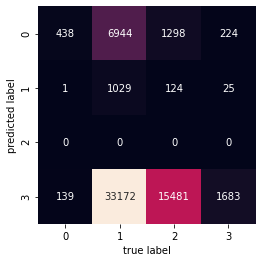

In [118]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Binary Classification

In [142]:
y_two_class = y_train
y_two_class.head(20)

,Severity
0,1
1,1
2,2
3,2
4,1
5,1
6,1
7,1
8,1
9,2


In [143]:
y_two_class = y_two_class.replace([1,2], 0)

In [144]:
y_two_class = y_two_class.replace([3,4], 1)
y_two_class.head(20)

,Severity
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [148]:
y_two_class_test = pd.DataFrame(y_test)

In [149]:
y_two_class_test = y_two_class_test.replace([1,2], 0)

In [150]:
y_two_class_test = y_two_class_test.replace([3,4], 1)

In [151]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=101, criterion = "gini")


# Train Decision Tree Classifer
clf = clf.fit(X_train, y_two_class)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [153]:
#show real values of y
y_two_class_test.head()

,Severity
704109,0
2116532,0
853397,0
534610,0
2409164,0


In [154]:
#show some predicted values of y
y_pred[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [156]:
#print classification report for model
print(classification_report(y_two_class_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96     58626
           1       0.16      0.26      0.20      1932

    accuracy                           0.93     60558
   macro avg       0.57      0.61      0.58     60558
weighted avg       0.95      0.93      0.94     60558



## Bagging on Two Label Data

In [157]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state = 101), n_estimators = 100)
bag_clf.fit(X_train, y_two_class)
y_pred_bag = bag_clf.predict(X_test)

print(accuracy_score(y_two_class_test, y_pred_bag))

C:\Users\Adam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.9621189603355461


# Apply Default DecisionTreeClassifer to dataset

In [33]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=101, criterion = "gini")


# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [34]:
#show real values of y
y_test.head()

704109     2
2116532    2
853397     1
534610     1
2409164    1
Name: Severity, dtype: int64

In [35]:
#show some predicted values of y
y_pred[:5]

array([1, 2, 1, 1, 1], dtype=int64)

In [36]:
#print classification report for model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.44      0.34       578
           1       0.82      0.76      0.79     41145
           2       0.54      0.58      0.56     16903
           3       0.16      0.26      0.20      1932

    accuracy                           0.69     60558
   macro avg       0.45      0.51      0.47     60558
weighted avg       0.71      0.69      0.70     60558



In [37]:
# Create Decision Tree classifer object using entropy
clf_ent = DecisionTreeClassifier(random_state=101, criterion = "entropy")


# Train Decision Tree Classifer
clf_ent = clf_ent.fit(X_train, y_train)


#Predict the response for test dataset
y_pred_ent = clf_ent.predict(X_test)

In [38]:
#print classification report for model
print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

           0       0.29      0.38      0.33       578
           1       0.82      0.76      0.79     41145
           2       0.54      0.59      0.56     16903
           3       0.16      0.25      0.20      1932

    accuracy                           0.69     60558
   macro avg       0.45      0.50      0.47     60558
weighted avg       0.71      0.69      0.70     60558



# Find optimal depth for DecisionTree

In [39]:
# The list of max_depth parameters are given as below
depth_list = np.arange(15, 35, 1)

from sklearn.metrics import accuracy_score

accuracy = [] # list of accuracy

# Finish the for loop below
for depth in depth_list:
    #creating the decision tree classifier with random state 101
    clf2 = DecisionTreeClassifier(max_depth = depth, random_state = 101, criterion = "entropy")
    clf2 = clf2.fit(X_train, y_train)
    y_pred2 = clf2.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred2))
    

In [40]:
# Show the list of accuracy from models
accuracy

[0.6030582251725618,
 0.6309158162422801,
 0.6577165692394068,
 0.6620925393837312,
 0.6656593678787278,
 0.6680867928267116,
 0.6797120116252188,
 0.680818388982463,
 0.6865979721919482,
 0.6884969781036362,
 0.6916840054162952,
 0.6899666435483338,
 0.6923280161167806,
 0.6935004458535619,
 0.6944416922619637,
 0.6958618184220087,
 0.6934674196637934,
 0.6927408434888866,
 0.6933188018098352,
 0.6937976815614783]

Text(0, 0.5, 'Classification Accuracy')

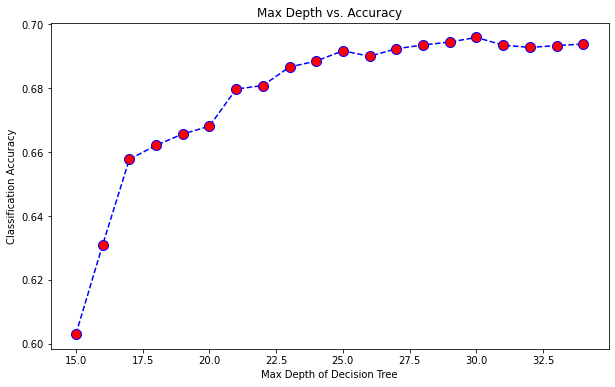

In [41]:
# Plot the elbow curve
plt.figure(figsize=(10,6))
plt.plot(depth_list,accuracy,
         color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Max Depth vs. Accuracy')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Classification Accuracy')

In [42]:
#find the optimal depth value from the depth list
optimal = depth_list[accuracy.index(max(accuracy))]

#retrain Decision Tree with optimal depth
clf3 = DecisionTreeClassifier(max_depth = optimal, criterion = "entropy", random_state = 101)

#train the classifier
clf3 = clf3.fit(X_train, y_train)


#Predict response for test dataset
y_pred4 = clf3.predict(X_test)

#print classification report
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.29      0.41      0.34       578
           1       0.83      0.75      0.79     41145
           2       0.54      0.62      0.58     16903
           3       0.17      0.26      0.20      1932

    accuracy                           0.70     60558
   macro avg       0.46      0.51      0.48     60558
weighted avg       0.72      0.70      0.71     60558



# Bagging on DecisionTrees

In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


bag_clf = BaggingClassifier(base_estimator = DecisionTreeClassifier(random_state = 101), n_estimators = 100)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_bag))

C:\Users\Adam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.7639453086297434


Text(91.68, 0.5, 'predicted label')

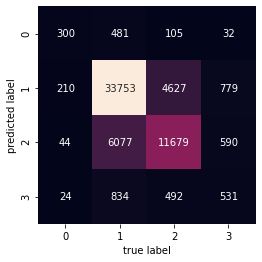

In [34]:
mat = confusion_matrix(y_test, y_pred_bag)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', max_depth = 5, random_state = 101)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

<ipython-input-46-fda70d7c0ef8>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


0.46466197694771955
              precision    recall  f1-score   support

           0       0.09      0.93      0.17       578
           1       0.89      0.42      0.57     41145
           2       0.42      0.57      0.48     16903
           3       0.07      0.45      0.12      1932

    accuracy                           0.46     60558
   macro avg       0.37      0.59      0.33     60558
weighted avg       0.72      0.46      0.52     60558



In [47]:
#display feature importances
feature_importances = pd.Series(rf_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_importances

Start_Time               3.345791e-01
End_Time                 2.619130e-01
Traffic_Signal           4.640020e-02
Crossing                 4.428913e-02
Start_Lng                4.103198e-02
Start_Lat                3.962117e-02
Timezone                 3.917820e-02
Pressure(in)             3.619751e-02
State                    3.237016e-02
Weather_Condition        2.748928e-02
Zipcode                  2.615052e-02
Side                     2.496440e-02
Humidity(%)              1.238978e-02
Astronomical_Twilight    7.329585e-03
City                     5.864414e-03
Nautical_Twilight        4.882008e-03
Civil_Twilight           4.138464e-03
Sunrise_Sunset           3.426981e-03
County                   3.129922e-03
Temperature(F)           2.594579e-03
Wind_Direction           9.149821e-04
Wind_Speed(mph)          6.427278e-04
Visibility(mi)           1.981934e-04
Junction                 1.512289e-04
Station                  5.226726e-05
Stop                     5.039837e-05
Amenity     

No handles with labels found to put in legend.


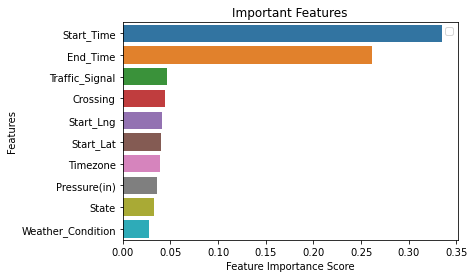

In [48]:
# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:k])

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.legend()
plt.show()

# Adaboost on DecisionTrees

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 1, random_state = 101), n_estimators = 100, random_state = 101, learning_rate = 0.5)

# Train the model with the dataset
ada_clf.fit(X_train, y_train)

y_pred_ada = ada_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

C:\Users\Adam\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.4892169490405892
              precision    recall  f1-score   support

           0       0.10      0.90      0.19       578
           1       0.81      0.48      0.60     41145
           2       0.41      0.51      0.46     16903
           3       0.07      0.36      0.11      1932

    accuracy                           0.49     60558
   macro avg       0.35      0.56      0.34     60558
weighted avg       0.67      0.49      0.54     60558



# ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [34]:
y_dummies = pd.get_dummies(y_train.values.ravel())
y_dummies.head()

,0,1,2,3
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [35]:
y_dummies.shape

(658284, 4)

In [36]:
X_train.shape

(658284, 34)

In [37]:
# Train test split with validation sets set aside
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X_train, y_dummies, test_size = 0.3, random_state = 101)

In [38]:
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size = 0.5, random_state = 101)

In [39]:
print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)

(460798, 34) (98743, 34) (98743, 34) (460798, 4) (98743, 4) (98743, 4)


In [40]:
#build the model
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(34,)))

# Adding the second hidden layer
model.add(Dense(units=64, activation='relu'))

#Dropout 25%
model.add(Dropout(0.25))

# Adding the third hidden layer
model.add(Dense(units=128, activation='relu'))

# Adding the fourth hidden layer
model.add(Dense(units=128, activation='relu'))

# Adding the fifth hidden layer
model.add(Dense(units=128, activation='relu'))

# Adding the sixth hidden layer
model.add(Dense(units=128, activation='relu'))

#Dropout 25%
model.add(Dropout(0.25))

# Adding the seventh hidden layer
model.add(Dense(units=128, activation='relu'))

# Adding the eighth hidden layer
model.add(Dense(units=64, activation='relu'))

#Adding the output layer
model.add(Dense(units=4, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2240      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

In [41]:
# Compiling the ANN
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.8833 - accuracy: 0.6092 - val_loss: 0.8112 - val_accuracy: 0.6461
Epoch 2/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.8169 - accuracy: 0.6447 - val_loss: 0.7777 - val_accuracy: 0.6635
Epoch 3/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.7919 - accuracy: 0.6556 - val_loss: 0.7570 - val_accuracy: 0.6725
Epoch 4/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.7779 - accuracy: 0.6621 - val_loss: 0.7470 - val_accuracy: 0.6787
Epoch 5/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.7657 - accuracy: 0.6677 - val_loss: 0.7347 - val_accuracy: 0.6837
Epoch 6/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.7576 - accuracy: 0.6716 - val_loss: 0.7292 - val_accuracy: 0.6904
Epoch 7/50
14400/14400 [==============================] - 17s 1ms/step - loss: 0.7519 - accuracy: 0.6743 - val_loss: 0

In [43]:
# Score trained model.
score = model.evaluate(X_test, y_test)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

3086/3086 [==============================] - 1s 404us/step - loss: 0.6751 - accuracy: 0.7207
Test loss: 0.6751022934913635
Test accuracy: 0.7206586599349976


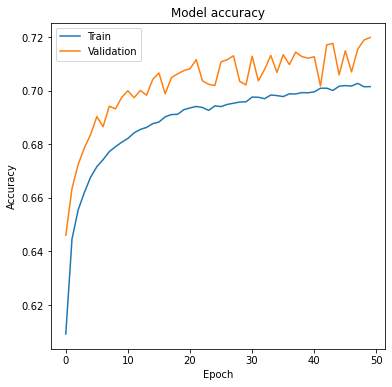

In [44]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [45]:
y_pred = model.predict(X_test)

In [46]:
y_test

,0,1,2,3
524329,0,0,0,1
543851,0,0,0,1
11683,0,1,0,0
33026,0,1,0,0
219365,0,1,0,0
...,...,...,...,...
507104,0,0,0,1
404871,0,0,1,0
2875,0,1,0,0
16043,0,1,0,0


In [47]:
y_test_convert = pd.DataFrame(y_test.idxmax(axis = 1))
y_test_convert

,0
524329,3
543851,3
11683,1
33026,1
219365,1
...,...
507104,3
404871,2
2875,1
16043,1


In [48]:
y_probs = pd.DataFrame(y_pred, index = y_test.index)
y_probs.head()

,0,1,2,3
524329,0.004302,0.235801,0.405105,0.354792
543851,0.002567,0.246631,0.479578,0.271224
11683,0.000021,0.832113,0.144301,0.023565
33026,0.000068,0.458424,0.426292,0.115215
219365,0.000427,0.253947,0.620887,0.124739


In [49]:
y_probs_convert = pd.DataFrame(y_probs.idxmax(axis = 1))
y_probs_convert

,0
524329,2
543851,2
11683,1
33026,1
219365,2
...,...
507104,3
404871,2
2875,2
16043,1


Text(91.68, 0.5, 'predicted label')

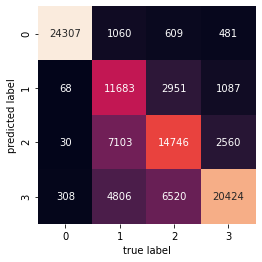

In [50]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_convert, y_probs_convert)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test_convert, y_probs_convert))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     24713
           1       0.74      0.47      0.58     24652
           2       0.60      0.59      0.60     24826
           3       0.64      0.83      0.72     24552

    accuracy                           0.72     98743
   macro avg       0.72      0.72      0.71     98743
weighted avg       0.72      0.72      0.71     98743



## CNN

In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [43]:
X_train_CNN = X_train.to_numpy().reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_CNN = X_val.to_numpy().reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_CNN = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)

In [44]:
model = Sequential()

#Convolution layer
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu', input_shape = (X_train_CNN.shape[1], X_train_CNN.shape[2])))
                 
#Max Pooling layer
model.add(MaxPooling1D(pool_size=2))

#Convolution layer
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu'))

#Max Pooling layer
model.add(MaxPooling1D(pool_size=2))

#Convolution layer
model.add(Conv1D(filters = 64, kernel_size = 3, activation = 'relu'))

#Max Pooling layer
model.add(MaxPooling1D(pool_size=2))

#Dropout 25%
model.add(Dropout(0.25))

#Flatten data
model.add(Flatten())

#Dense layer
model.add(Dense(512, activation='relu'))

#Dense layer
model.add(Dense(256, activation='relu'))

#Dropout 50%
model.add(Dropout(0.5))

#Output later
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 32, 64)            256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 16, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 14, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 64)             12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 64)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 64)            

In [45]:
# Compiling the CNN
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
hist = model.fit(X_train_CNN, y_train, batch_size=32, epochs=50, validation_data=(X_val_CNN, y_val))

Epoch 1/50
14400/14400 [==============================] - 43s 3ms/step - loss: 0.8718 - accuracy: 0.6156 - val_loss: 0.7923 - val_accuracy: 0.6556
Epoch 2/50
14400/14400 [==============================] - 42s 3ms/step - loss: 0.7827 - accuracy: 0.6632 - val_loss: 0.7340 - val_accuracy: 0.6857
Epoch 3/50
14400/14400 [==============================] - 44s 3ms/step - loss: 0.7488 - accuracy: 0.6792 - val_loss: 0.7289 - val_accuracy: 0.6882
Epoch 4/50
14400/14400 [==============================] - 43s 3ms/step - loss: 0.7286 - accuracy: 0.6896 - val_loss: 0.6863 - val_accuracy: 0.7047
Epoch 5/50
14400/14400 [==============================] - 43s 3ms/step - loss: 0.7133 - accuracy: 0.6964 - val_loss: 0.6670 - val_accuracy: 0.7189
Epoch 6/50
14400/14400 [==============================] - 42s 3ms/step - loss: 0.7015 - accuracy: 0.7022 - val_loss: 0.6523 - val_accuracy: 0.7232
Epoch 7/50
14400/14400 [==============================] - 42s 3ms/step - loss: 0.6926 - accuracy: 0.7065 - val_loss: 0

In [47]:
# Score trained model.
score = model.evaluate(X_test_CNN, y_test)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

3086/3086 [==============================] - 2s 809us/step - loss: 0.5777 - accuracy: 0.7652
Test loss: 0.5777316689491272
Test accuracy: 0.7652187943458557


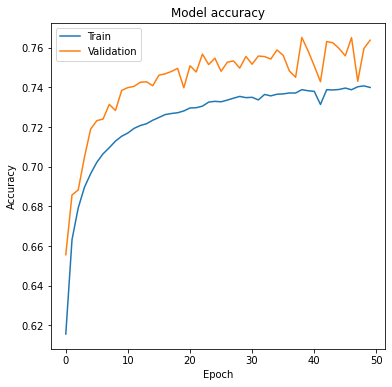

In [48]:
plt.figure(figsize=(6, 6))
plt.title('Model accuracy')

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Heatmap Using Predictions

In [52]:
#merge predictions with original dataset to make heatmap
#import dataset
df_test = pd.read_csv('C:/Users/Adam/Desktop/US_Accidents_June20.csv')

In [53]:
#display head of dataframe
pd.set_option('display.max_columns', None)
df_test.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [54]:
#drop columns we already know we do not need
df_test.drop(["ID", "Source", "TMC", "Distance(mi)", "Description", "Number", "Street", "Airport_Code", "Weather_Timestamp", "Country"], axis = 1, inplace = True)

In [55]:
#dropping further based on too many null values
df_test.drop(["End_Lat", "End_Lng", "Wind_Chill(F)", "Precipitation(in)"], axis = 1, inplace = True)

In [56]:
#drop records with null values
df_test.dropna(axis = 0, inplace = True)

In [57]:
#sample the df so runtimes aren't astronomical 
sample = df_test.sample(frac = 0.10, replace = False, random_state = 101)

In [58]:
#creating X and y vectors
X = sample.drop(['Severity'], axis = 1)
y = sample['Severity']

In [59]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=101)

In [60]:
#SMOTE (Synthetic Minority Over-sampling Technique) will resample the training dataset 
sm = SMOTE(random_state = 101)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [61]:
#get list of indicies from the y_probs_convert dataframe
y_pred_idx = list(y_probs_convert.index.values)

In [62]:
#grab rows that match the y_pred dataframe
df_idx = df_test[df_test.index.isin(y_pred_idx)]
df_idx.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Zipcode,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,Clermont,OH,45176,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
10,3,2016-02-08 08:14:42,2016-02-08 08:44:42,39.952812,-83.119293,R,Columbus,Franklin,OH,43228,US/Eastern,35.6,93.0,29.64,5.0,WNW,5.8,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
12,2,2016-02-08 08:36:34,2016-02-08 09:06:34,39.737633,-84.149933,R,Dayton,Montgomery,OH,45420-1863,US/Eastern,33.8,100.0,29.63,3.0,SW,2.3,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
16,2,2016-02-08 08:53:17,2016-02-08 09:23:17,39.748329,-84.224007,R,Dayton,Montgomery,OH,45402,US/Eastern,35.6,99.0,29.65,7.0,WSW,2.3,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
23,3,2016-02-08 12:00:00,2016-02-08 12:45:00,40.023487,-82.994888,R,Columbus,Franklin,OH,43211,US/Eastern,37.0,96.0,29.63,8.0,West,5.8,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [63]:
y_probs_convert

,0
524329,2
543851,2
11683,1
33026,1
219365,2
...,...
507104,3
404871,2
2875,2
16043,1


In [64]:
#impute predicted severity into the real severity column
col = y_probs_convert
df_idx["Prediction"] = col

<ipython-input-64-36013a454f19>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idx["Prediction"] = col


In [65]:
#Prediction column is the predicted severity
df_idx.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Zipcode,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Prediction
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,Clermont,OH,45176,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2
10,3,2016-02-08 08:14:42,2016-02-08 08:44:42,39.952812,-83.119293,R,Columbus,Franklin,OH,43228,US/Eastern,35.6,93.0,29.64,5.0,WNW,5.8,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3
12,2,2016-02-08 08:36:34,2016-02-08 09:06:34,39.737633,-84.149933,R,Dayton,Montgomery,OH,45420-1863,US/Eastern,33.8,100.0,29.63,3.0,SW,2.3,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3
16,2,2016-02-08 08:53:17,2016-02-08 09:23:17,39.748329,-84.224007,R,Dayton,Montgomery,OH,45402,US/Eastern,35.6,99.0,29.65,7.0,WSW,2.3,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0
23,3,2016-02-08 12:00:00,2016-02-08 12:45:00,40.023487,-82.994888,R,Columbus,Franklin,OH,43211,US/Eastern,37.0,96.0,29.63,8.0,West,5.8,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2


In [66]:
import gmaps
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime

In [67]:
df_idx["sTOD"] = df_idx.Start_Time.apply(lambda x: pd.to_datetime(x).time())
df_idx["eTOD"] = df_idx.End_Time.apply(lambda x: pd.to_datetime(x).time())

<ipython-input-67-020aa82b151a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idx["sTOD"] = df_idx.Start_Time.apply(lambda x: pd.to_datetime(x).time())
<ipython-input-67-020aa82b151a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idx["eTOD"] = df_idx.End_Time.apply(lambda x: pd.to_datetime(x).time())


In [68]:
df_idx.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Side,City,County,State,Zipcode,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Prediction,sTOD,eTOD
2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,R,Williamsburg,Clermont,OH,45176,US/Eastern,36.0,100.0,29.67,10.0,SW,3.5,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2,06:49:27,07:19:27
10,3,2016-02-08 08:14:42,2016-02-08 08:44:42,39.952812,-83.119293,R,Columbus,Franklin,OH,43228,US/Eastern,35.6,93.0,29.64,5.0,WNW,5.8,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3,08:14:42,08:44:42
12,2,2016-02-08 08:36:34,2016-02-08 09:06:34,39.737633,-84.149933,R,Dayton,Montgomery,OH,45420-1863,US/Eastern,33.8,100.0,29.63,3.0,SW,2.3,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,3,08:36:34,09:06:34
16,2,2016-02-08 08:53:17,2016-02-08 09:23:17,39.748329,-84.224007,R,Dayton,Montgomery,OH,45402,US/Eastern,35.6,99.0,29.65,7.0,WSW,2.3,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,0,08:53:17,09:23:17
23,3,2016-02-08 12:00:00,2016-02-08 12:45:00,40.023487,-82.994888,R,Columbus,Franklin,OH,43211,US/Eastern,37.0,96.0,29.63,8.0,West,5.8,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2,12:00:00,12:45:00


In [69]:
layer3 = gmaps.heatmap_layer([[0,0]],point_radius=10,max_intensity=4)
fig3 = gmaps.figure(center=(38.1,-99),layout={'width':'900px', 'height': '600px'}, zoom_level=4.2, map_type="ROADMAP")
fig3.add_layer(layer3)

In [70]:
@interact(
            df = fixed(df_idx),
            layer = fixed(layer3),
            r = widgets.IntSlider(description="Radius",min=0,max=30,step=1,value=15),
            t = widgets.IntSlider(description="Hour Of Day",min=0,max=23,step=1,value=0)
         )
def regenMap(df,layer,r,t):
    layer.point_radius = r
    time = datetime.datetime(1970,1,1)
    time = (time + datetime.timedelta(hours = t)).time()
    
    mask = (df["sTOD"] <= time) & (df["eTOD"] >= time)
    masked = df[mask]
    if len(masked.index)>0:
        layer.weights = masked.Prediction
        layer.locations = masked[["Start_Lat","Start_Lng"]]
    return time.hour

fig3

interactive(children=(IntSlider(value=15, description='Radius', max=30), IntSlider(value=0, description='Hour …

Figure(layout=FigureLayout(height='600px', width='900px'))